Create Dataset

In [1]:
using SyntheticDatasets
using Plots

include("../src/NNJulia.jl")
using .NNJulia

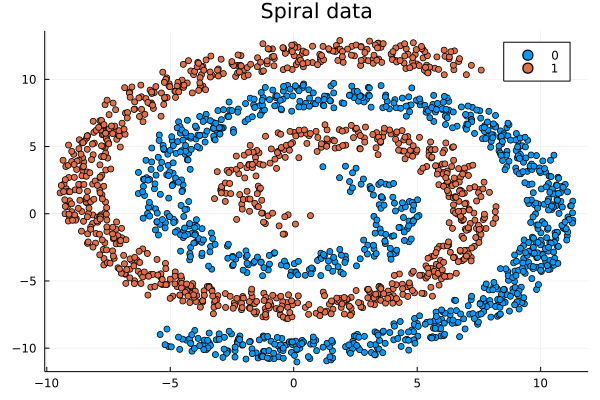

In [2]:
spirals = SyntheticDatasets.make_twospirals(n_samples = 2000, 
                                            start_degrees = 90,
                                            total_degrees = 570, 
                                            noise =1.9);

scatter(spirals.feature_1,spirals.feature_2,group=spirals.label,title="Spiral data")

In [3]:
xData = permutedims([spirals.feature_1 spirals.feature_2]) # 2x2000
#TODO: rendre possible d'avoir des données de différent type dans dataloader en faisant Tensor{aBSTRACTRRAY(Any,N) where N}
# temporaire :
yData = float.(permutedims(spirals.label)) #1x2000

1×2000 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [11]:
model = Sequential(
        Dense(2, 4, relu),
        Dense(4, 8, relu),
        Dense(8, 1, sigmoid),
    )

Sequential with : 3 layer


Dense: 2 --> 4
weight: (4, 2)
bias: (4,)
activation function: relu
Dense: 4 --> 8
weight: (8, 4)
bias: (8,)
activation function: relu
Dense: 8 --> 1
weight: (1, 8)
bias: (1,)
activation function: sigmoid


In [8]:
opt = GradientDescent(0.1)
loss = BinaryCrossentropy
batchsize = 64
nbEpochs = 200

200

In [9]:
trainData = DataLoader(xData, yData, batchsize,true)

DataLoader{Union{Float64, Int64, AbstractArray}}([-0.6124668431393201 -0.726738538920081 … -4.388853494890818 -4.279054755583891; -10.640889678872094 8.643989181424704 … -5.839781152614044 -6.123288118275121], [0.0 0.0 … 1.0 1.0], 64, [1, 65, 129, 193, 257, 321, 385, 449, 513, 577  …  1409, 1473, 1537, 1601, 1665, 1729, 1793, 1857, 1921, 1985], true, 32)

In [12]:
train!(model, opt, loss, trainData, nbEpochs, true)

Epoch 1 : accuracy = 0.0%, loss = 29.694781884667393
Epoch 2 : accuracy = 0.0%, loss = 21.306612937106248
Epoch 3 : accuracy = 0.0%, loss = 21.04576421985442
Epoch 4 : accuracy = 0.0%, loss = 20.573659169160695
Epoch 5 : accuracy = 0.0%, loss = 20.151021697806794
Epoch 6 : accuracy = 0.0%, loss = 20.354757997406892
Epoch 7 : accuracy = 0.0%, loss = 19.78622860580434
Epoch 8 : accuracy = 0.0%, loss = 20.698060716452336
Epoch 9 : accuracy = 0.0%, loss = 19.968712891692043
Epoch 10 : accuracy = 0.0%, loss = 19.339127897396484
Epoch 11 : accuracy = 0.0%, loss = 20.077140236032786
Epoch 12 : accuracy = 0.0%, loss = 19.347197028508056
Epoch 13 : accuracy = 0.0%, loss = 19.454298025148667
Epoch 14 : accuracy = 0.0%, loss = 19.573711494528922
Epoch 15 : accuracy = 0.0%, loss = 19.07997008298428
Epoch 16 : accuracy = 0.0%, loss = 19.081081853950963
Epoch 17 : accuracy = 0.0%, loss = 17.070434351930853
Epoch 18 : accuracy = 0.0%, loss = 18.62410376853538
Epoch 19 : accuracy = 0.0%, loss = 19.092

Epoch 190 : accuracy = 0.0%, loss = 12.021967467523114
Epoch 191 : accuracy = 0.0%, loss = 13.036599977516756
Epoch 192 : accuracy = 0.0%, loss = 12.581597849513807
Epoch 193 : accuracy = 0.0%, loss = 12.269965329897548
Epoch 194 : accuracy = 0.0%, loss = 12.305687382502676
Epoch 195 : accuracy = 0.0%, loss = 12.491817771961621
Epoch 196 : accuracy = 0.0%, loss = 12.22455466233942
Epoch 197 : accuracy = 0.0%, loss = 12.62548710818657
Epoch 198 : accuracy = 0.0%, loss = 12.669120655074206
Epoch 199 : accuracy = 0.0%, loss = 12.00433110561887
Epoch 200 : accuracy = 0.0%, loss = 12.84245282295819


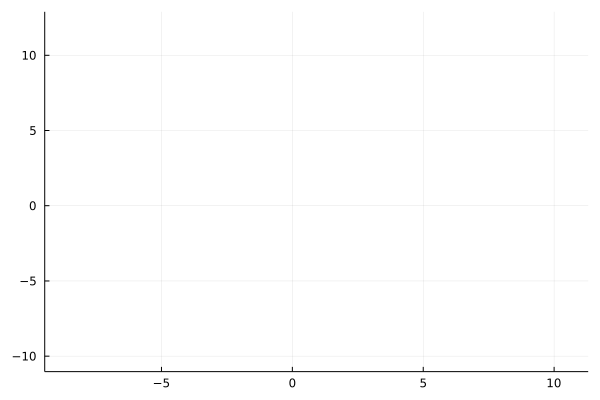

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.


In [66]:
ccol = cgrad([RGB(1,.3,.3), RGB(.4,1,.4)])
mcol = [RGB(1,.1,.1) RGB(.3,1,.3)]
m = [:rect :circle]

data = [ i + j for i=1:15, j=1:15 ]
scatter(xData[1,:], xData[2,:],group=yData[:])
contour(xData[1,:], xData[2,:], data, f=true, nlev=3, c=ccol, leg=:none)


   

In [75]:
data = collect(Iterators.product(1:15, 1:15))
[model([d[1], d[2]]).data for d in data]

15×15 Matrix{Vector{Float64}}:
 [0.432562]     [0.432562]     [0.432562]     …  [0.432562]     [0.432562]
 [0.432562]     [0.432562]     [0.432562]        [0.432562]     [0.432562]
 [0.432562]     [0.432562]     [0.432562]        [0.432562]     [0.432562]
 [0.468804]     [0.471926]     [0.475051]        [0.509502]     [0.512635]
 [0.628657]     [0.631578]     [0.63449]         [0.665838]     [0.668621]
 [0.764564]     [0.766813]     [0.769047]     …  [0.792626]     [0.794679]
 [0.861675]     [0.863162]     [0.864636]        [0.837889]     [0.831686]
 [0.472518]     [0.461323]     [0.450167]        [0.304182]     [0.292148]
 [0.0382475]    [0.0359988]    [0.0338776]       [0.0172464]    [0.0162116]
 [0.00150905]   [0.00141714]   [0.00133083]      [0.000666474]  [0.000625851]
 [5.7432e-5]    [5.39294e-5]   [5.05643e-5]   …  [2.45959e-5]   [2.30362e-5]
 [1.91505e-6]   [1.7936e-6]    [1.67986e-6]      [8.1711e-7]    [7.65291e-7]
 [6.3619e-8]    [5.95845e-8]   [5.58058e-8]      [2.71448e-8]